# Importing libraries

In [1]:
import sys
from tqdm import tqdm   
import numpy as np
from iminuit import Minuit
import json

In [ ]:
sys.argv = [
    'main.py',
    '--data_env', 'envs/DATA/DESI_QSO_Y1.env',
    '--sampler_env', 'envs/sampler/sound_singlepol.env',
    '--mock', '5',
    '--machine', 'MAC',
    '--reconstruction', 'False',
    '--omega_min', '100',
    '--omega_max', '500',
    '--EZMOCK', 'False',
    '--debug', 'True',
]

from main import *  # Replace with the name of your script file (without .py)

In [34]:
omega = 200
log_beta = 6
A = -0.5
N = 2*len(k)

PF_guess = np.array([3,2.8,0,0,0,0,0,1,5,3,A,omega,log_beta])
BAO_guess = np.array([3,2.8,0,0,0,0,0,1,5,3,0,1,0])

# Inject noise into BAO and PF data
noise_BAO = np.random.multivariate_normal(mean=np.zeros(N), cov=COV)
noise_PF = np.random.multivariate_normal(mean=np.zeros(N), cov=COV)

data_BAO_bare = theory(BAO_guess)
data_PF_bare = theory(PF_guess)

data_BAO = data_BAO_bare + noise_BAO
data_PF = data_PF_bare + noise_PF


mcmc.set_gelman_rubin({
    "N":1,
    "epsilon":10,
    "min_length":3000,
    "convergence_steps":10
})
fn_wf_ngc = None
fn_wf_sgc = None

In [ ]:
handle_final = 'noiseless_synthetic_'+handle
PrimordialFeature_likelihood.set_data(data_PF_bare)
mcmc.run(handle_final, 1, initial_positions, logposterior, gelman_rubin=True, new=True, plots=True)

handle_final = 'noisy_synthetic_'+handle
PrimordialFeature_likelihood.set_data(data_PF)
mcmc.run(handle_final, 1, initial_positions, logposterior, gelman_rubin=True, new=True, plots=True)

handle_final = 'noiseless_BAO_'+handle
PrimordialFeature_likelihood.set_data(data_BAO_bare)
mcmc.run(handle_final, 1, initial_positions, logposterior, gelman_rubin=True, new=True, plots=True)

handle_final = 'noisy_BAO_'+handle
PrimordialFeature_likelihood.set_data(data_BAO)
mcmc.run(handle_final, 1, initial_positions, logposterior, gelman_rubin=True, new=True, plots=True)

In [ ]:
mcmc.run(handle, 1, initial_positions, logposterior, gelman_rubin=True, new=True, plots=True)

In [2]:
import h5py as h5
from getdist import plots, MCSamples
%matplotlib inline

import matplotlib as mpl
# Define global rcParams settings
mpl.rcParams.update({
    # TICK SETTINGS
    'xtick.direction': 'inout',
    'ytick.direction': 'inout',
    'xtick.major.size': 4,      # major tick size in points
    'xtick.major.width': 1,     # major tick width in points
    'ytick.major.size': 4,      # major tick size in points
    'ytick.major.width': 1,     # major tick width in points

    # GRID SETTINGS
    'axes.grid': True,
    'grid.color': 'grey',
    'grid.linestyle': '-',
    'grid.linewidth': 0.7,
    'grid.alpha': 0.2,

    # LEGEND SETTINGS
    'legend.fancybox': True,
    'legend.facecolor': 'white',
    'legend.framealpha': 0.5,
    'legend.edgecolor': 'grey',

    # FIGURE & SUBPLOT SETTINGS
    'figure.autolayout': False,
    'figure.frameon': True,
    'figure.subplot.left': 0.08,
    'figure.subplot.right': 0.96,

    # LINE SETTINGS
    'lines.linewidth': 1.5,

    # AXES SETTINGS
    'axes.facecolor': 'white',
    'axes.edgecolor': 'black',
    'axes.formatter.use_mathtext': True,  # use math text for scientific notation
    'axes.linewidth': 1.0,
    'axes.labelcolor': 'black',
    'axes.labelsize': 16,

    # FONT SETTINGS
    'font.family': 'serif',
    'font.size': 13,

    # TEXT SETTINGS
    'text.color': 'k',
    'text.usetex': False,

    # MATHTEXT SETTINGS
    'mathtext.cal': 'cursive',
    'mathtext.rm': 'serif',
    'mathtext.tt': 'monospace',
    'mathtext.it': 'serif:italic',
    'mathtext.bf': 'serif:italic:bold',
    'mathtext.sf': 'sans_serif',
    'mathtext.fontset': 'dejavusans',
})

tracer_colors = tracer_colors = {
    'DESI_Y1_LRG1': 'orange',
    'DESI_Y1_LRG2': 'orangered',
    'DESI_Y1_LRG3': 'firebrick',
    'DESI_Y1_QSO':  'seagreen',
    'DESI_Y1_ELG1': 'skyblue',
    'DESI_Y1_ELG2': 'steelblue'
}

In [3]:
# Define files
files_lowz = [
    '/Users/s2223060/Desktop/primordial_features/chains/BOSS_lowz/DATA/CPSC_singlepol/13.7_17.7/DATA_POST_BOSS_lowz_CPSC_singlepol_13.7_17.7_combined.h5',
    '/Users/s2223060/Desktop/primordial_features/chains/BOSS_lowz/DATA/CPSC_singlepol/17.7_20.0/DATA_POST_BOSS_lowz_CPSC_singlepol_17.7_20.0_combined.h5'
]

files_highz = [
    '/Users/s2223060/Desktop/primordial_features/chains/BOSS_highz/DATA/CPSC_singlepol/13.7_17.7/DATA_POST_BOSS_highz_CPSC_singlepol_13.7_17.7_combined.h5',
    '/Users/s2223060/Desktop/primordial_features/chains/BOSS_highz/DATA/CPSC_singlepol/17.7_20.0/DATA_POST_BOSS_highz_CPSC_singlepol_17.7_20.0_combined.h5'
]

def load_results(files):
    # Load and concatenate chains
    chains = []
    logprobs = []

    for f in files:
        with h5.File(f, 'r') as file:
            chains.append(file['chain'][:])
            logprobs.append(file['logprob'][:])

    combined_chain = np.concatenate(chains, axis=0)
    combined_chain = combined_chain.reshape(-1, combined_chain.shape[-1])
    combined_chain[:,-2] = 0.135036080469101E+002 - combined_chain[:,-2]
    combined_logprob = np.concatenate(logprobs, axis=0)
    combined_logprob = combined_logprob.flatten()
    return combined_chain, combined_logprob


In [10]:
import numpy as np
from scipy.stats import gaussian_kde

In [11]:
chain_lowz, logprob_lowz = load_results(files_lowz)
chain_highz, logprob_highz = load_results(files_highz)

In [12]:
weight_highz = np.load('weight_highz.npy')

In [13]:
weight_highz.shape

(1072500,)

In [14]:
chain_highz.shape

(1072500, 13)

In [16]:
# Parameter names and labels
names = ["BNGC", "BSGC", "a0", "a1", "a2", "a3", "a4", "alpha", "sigma_nl", "sigma_s", "A", "omega", "log_beta"]
labels = [r'B_{\rm NGC}', r'B_{\rm SGC}', r"a_0", r"a_1", r"a_2", r"a_3", r"a_4", r"\alpha",r"\Sigma_{\rm nl}",r"\Sigma_s", r"dP", r"N_* - N_0",r"\log_{10} \frac{\omega}{H}"]

# Create combined MCSamples object
samples = MCSamples(
    samples=chain_highz,
    weights=weight_highz,
    names=names,
    labels=labels,
    settings={'contours': [0.68, 0.95],'smooth_scale_2D': 0.01},
    ranges = {'log_beta':[-0.1,2.1],'A':[0,0.5],'omega':[-7,0]}
)

# Best-fit point
#best_idx = np.argmax(combined_logprob)
#best_fit = combined_chain[best_idx]
#best_fit_dict = dict(zip(names, best_fit))

#print(f"Best-fit As: {best_fit_dict['A']:.5f}")
#print(f"Best-fit omega: {best_fit_dict['omega']:.5f}")

Removed no burn in


In [17]:
best_fit_planck_dit = {'A':0.02346,'omega':-2.49639,'log_beta':1.25511}

<Figure size 600x450 with 0 Axes>

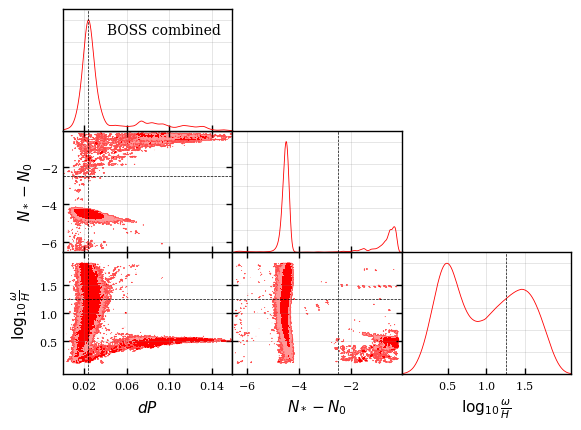

In [28]:
g1 = plots.get_single_plotter(width_inch=6)
g1.triangle_plot(
    samples,
    ['A', 'omega','log_beta'],
    line_args=[{'ls':'-', 'color':'red'}],
    contour_args=[{'ls':'-', 'color':'red'}],
    markers={k: best_fit_planck_dit[k] for k in ['omega','A','log_beta']},
    marker_args={'lw': 0.5, 'color':'black'},filled = True
)
g1.add_text(r'BOSS combined',-1.74,2.825, font = 'serif',fontsize = 10)
#g1.add_text('BAO ',-1.95,2.7, font = 'serif',fontsize = 10)
g1.export('CPSC_BOSS_combined.pdf')

# Binning the posteriors

In [36]:
# Define files
files = {
    "noiseless_BAO":'/Users/s2223060/Desktop/primordial_features/chains/DESI_Y1_QSO/MOCK_5/sound_singlepol/100.0_500.0/noiseless_BAO_MOCK_5_PRE_DESI_QSO_Y1_sound_singlepol_100.0_500.0_Run_0.h5',
    "noisy_BAO":'/Users/s2223060/Desktop/primordial_features/chains/DESI_Y1_QSO/MOCK_5/sound_singlepol/100.0_500.0/noisy_BAO_MOCK_5_PRE_DESI_QSO_Y1_sound_singlepol_100.0_500.0_Run_0.h5',
    "noiseless_PF":'/Users/s2223060/Desktop/primordial_features/chains/DESI_Y1_QSO/MOCK_5/sound_singlepol/100.0_500.0/noiseless_synthetic_MOCK_5_PRE_DESI_QSO_Y1_sound_singlepol_100.0_500.0_Run_0.h5',
    "noisy_PF":'/Users/s2223060/Desktop/primordial_features/chains/DESI_Y1_QSO/MOCK_5/sound_singlepol/100.0_500.0/noisy_synthetic_MOCK_5_PRE_DESI_QSO_Y1_sound_singlepol_100.0_500.0_Run_0.h5',
}

chains = {}

for key, f in files.items():
    with h5.File(f, 'r') as file:
        chains[key] = file['mcmc']['chain'][:]

In [37]:
freq_edges = np.arange(100, 520, 20)  # edges for binning
freq_centers = 0.5 * (freq_edges[:-1] + freq_edges[1:])

# Prepare storage for results
results = {}

for key, chain in chains.items():
    freq_vals = chain[..., -2]  # frequency values
    param_m3 = chain[..., -3]
    param_m1 = chain[..., -1]

    mean_m3 = []
    std_m3 = []
    mean_m1 = []
    std_m1 = []

    # Loop through bins
    for low, high in zip(freq_edges[:-1], freq_edges[1:]):
        mask = (freq_vals >= low) & (freq_vals < high)
        selected_m3 = param_m3[mask]
        selected_m1 = param_m1[mask]

        mean_m3.append(np.mean(selected_m3) if len(selected_m3) > 0 else np.nan)
        std_m3.append(np.std(selected_m3) if len(selected_m3) > 0 else np.nan)
        mean_m1.append(np.mean(selected_m1) if len(selected_m1) > 0 else np.nan)
        std_m1.append(np.std(selected_m1) if len(selected_m1) > 0 else np.nan)

    results[key] = {
        'freq_centers': freq_centers,
        'mean_m3': np.array(mean_m3),
        'std_m3': np.array(std_m3),
        'mean_m1': np.array(mean_m1),
        'std_m1': np.array(std_m1),
    }

In [ ]:
for x in results.keys():
    plt.figure()
    plt.errorbar(results[x]['freq_centers'],results[x]['mean_m3'],yerr = results[x]['std_m3'])
    plt.title(x)

    plt.figure()
    plt.errorbar(results[x]['freq_centers'],results[x]['mean_m1'],yerr = results[x]['std_m1'])
